<a href="https://colab.research.google.com/github/shadikhan/758BColabs/blob/master/Convolution_Neural_Network_Classwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Review of simple Computer Vision sample from last class

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images / 255.0
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

test_loss = model.evaluate(test_images, test_labels)

4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5043 - accuracy: 0.8240
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3790 - accuracy: 0.8633
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3373 - accuracy: 0.8768
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3148 - accuracy: 0.8842
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3527 - accuracy: 0.8740


# Convolution

Instead of focusing on pixel, Convolution "highlioghts" the features of picture the computer should look for to recognize an object.

In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Make the correct shape
training_images= training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

model = tf.keras.models.Sequential([
  # TODO First Convolution layer
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  # TODO Maxpooling
  tf.keras.layers.MaxPooling2D(2, 2),
  # TODO First Convolution layer
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  # TODO Maxpooling
  tf.keras.layers.MaxPooling2D(2, 2),
  # TODO Collect Input
  tf.keras.layers.Flatten(),
  # TODO Create Hidden Layer
  tf.keras.layers.Dense(128, activation='relu'),
  # TODO Create Output Layer
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# TODO Print Model Summary 
model.summary()

# TODO Train the model
model.fit(training_images, training_labels, epochs=5)

# TODO Evaluate the result 
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [3]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


# Visualize the ConvNet in action

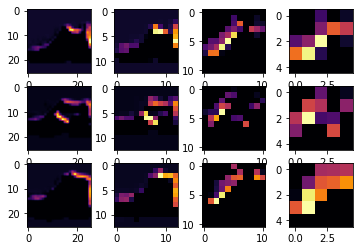

In [4]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

# Try it yourself and share with the class next week

- Change the number of filter from 32 to 64 and 16. How will this change the training time and accuracy?

- What happen when we remove or add layer of Convolution? How does it impact accuracy or training time?

- Add a Callback so that training will stop after 90% accuracy is attained